# Q3. If yes, can any of these health-related factors be attributed to air pollution?

#### Steps
1. Prepare data 
2. Identify health factors that were associated with an increased number of covid cases or covid severity
3. Find the association between these health conditions and air pollution 
4. Data visualisation 

### 1. Prepare data - import libraries and data and join tables
- pandas, matplotlib, seaborn and numpy libraries were used for this analysis
- health-related factors data was imported from the 'all_COVID data.csv' 
- air quality data was imported from the "Air_quality_data.csv"
- 'location_codes' was used to join these data sources 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np
all_data = pd.read_csv("/content/all_COVID data.csv")
air_quality = pd.read_csv("/content/Air_quality_data.csv")
# joins the all_data and air_quality tables by their location_codes
df = all_data.join(air_quality, on='Location_code')

### 2. Identify health factors that were associated with an increased number of covid cases or covid severity
- Health factors were selected based on previous analysis looking at whether there were any health-related factors that were associated with an increased number of covid cases or covid severity
- hayfever (r=0.83), ecig vape useage (r=0.8), migraine (r=0.77), longstanding illness (r=0.8), back pain (r=0.76), asthma (r=0.63), fits etc (r=0.60) were selected as they had a very strong (r > 0.8) / strong association (0.6 < r < 0.79) with covid dealths 
- these health factors were selected from the joined data table

In [2]:
# selects the health conditions that had a very strong/strong correlation with covid deaths 
df2 = df.filter(['hayfever', 'ecig_vape_usage', 'migraine', 'longstanding_illness', 'back_pain', 'asthma', 'fits_etc', 'aqi_day_average'], axis=1)

### 3. Find the association between these health conditions and air pollution 
- association was found by finding the correlation between the prevelenace of each health condition and the average aqi index value of each region
- the strength and direction of this correlation was represented using pearsons correlation coeffient

In [3]:
# finds the correlation between each health condition and the aqi_day_average 
correlation = round(df2.corrwith(df2['aqi_day_average']), 2)
correlation

hayfever                0.11
ecig_vape_usage         0.16
migraine               -0.19
longstanding_illness   -0.05
back_pain              -0.02
asthma                 -0.13
fits_etc                0.72
aqi_day_average         1.00
dtype: float64

### 4. Data visualisation
- a bar chart was used to represent the correlation coeffients for each health condition

Text(0.5, 1.0, 'Association between health-related factors and air pollution')

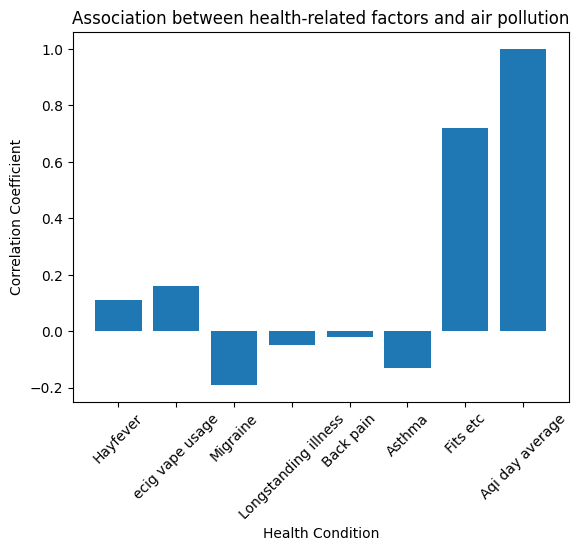

In [4]:
# plots a bar graph of the correlation coefficient of the association between each health condition and the aqi_day_average 
x= ['Hayfever', 'ecig vape usage', 'Migraine', 'Longstanding illness', 'Back pain', 'Asthma', 'Fits etc', 'Aqi day average']
plt.bar(x,correlation)
plt.xlabel('Health Condition')
plt.xticks(rotation = 45) 
plt.ylabel('Correlation Coefficient')
plt.title('Association between health-related factors and air pollution')

Figure 1 - This bar chart shows the association between various health conditions and air pollution. Health conditions were selected based on their association with covid deaths/severity. All health conditiosn selected had a positive association with covid dealths (r>0.6). The association of each health-related factor and air pollution was caluated and represented as a correlation coeffient. Each bar represents the correlation efficient for each health related factor. The final bar represents the correlation between the aqi value so should be ignored. 

Text(0.5, 1.0, 'Association between fits etc and air pollution')

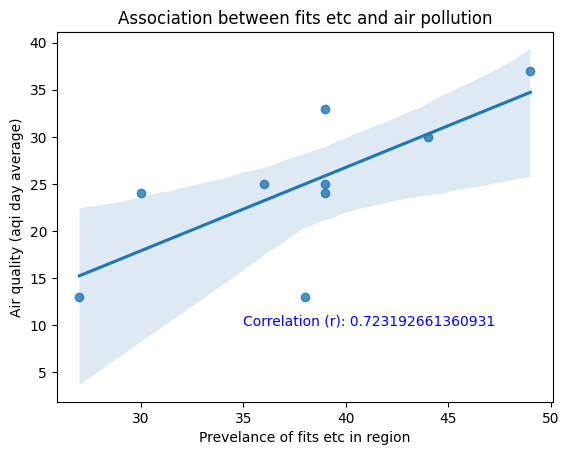

In [24]:
sns.regplot(y=df2['fits_etc'],x=df2['aqi_day_average'])

correlation_coefficient = np.corrcoef(df2['fits_etc'], df2['aqi_day_average'])[0, 1]

correlation_text = f'Correlation (r): {correlation_coefficient}'
plt.text(35,10, correlation_text, fontsize = 10, color='blue')

plt.xlabel('Prevelance of fits etc in region')
plt.ylabel('Air quality (aqi day average)')
plt.title('Association between fits etc and air pollution')

### Key findings 
- The data showed a strong positive correlation between the prevalence of fits etc in regions with high air pollution. This suggests that the association between fits etc and covid deaths may be attributed to air pollution. 